In [38]:
import numpy as np
import pandas as pd
Incident=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/LFB Incident data Last 3 years.csv")
Mobilisation=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/LFB Mobilisation data Last 3 years.csv", sep=';')

In [2]:
Incident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381366 entries, 0 to 381365
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          381366 non-null  object 
 1   DateOfCall                              381366 non-null  object 
 2   CalYear                                 381366 non-null  int64  
 3   TimeOfCall                              381366 non-null  object 
 4   HourOfCall                              381366 non-null  int64  
 5   IncidentGroup                           381366 non-null  object 
 6   StopCodeDescription                     381366 non-null  object 
 7   SpecialServiceType                      136659 non-null  object 
 8   PropertyCategory                        381366 non-null  object 
 9   PropertyType                            381366 non-null  object 
 10  AddressQualifier                        3813

In [3]:
Mobilisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560529 entries, 0 to 560528
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   IncidentNumber            560529 non-null  object 
 1   CalYear                   560529 non-null  int64  
 2   HourOfCall                560529 non-null  int64  
 3   ResourceMobilisationId    560529 non-null  int64  
 4   Resource_Code             560529 non-null  object 
 5   PerformanceReporting      560529 non-null  object 
 6   DateAndTimeMobilised      560529 non-null  object 
 7   DateAndTimeMobile         558164 non-null  object 
 8   DateAndTimeArrived        560529 non-null  object 
 9   TurnoutTimeSeconds        558152 non-null  float64
 10  TravelTimeSeconds         558148 non-null  float64
 11  AttendanceTimeSeconds     560529 non-null  int64  
 12  DateAndTimeLeft           560292 non-null  object 
 13  DateAndTimeReturned       0 non-null       f

In [39]:
Mobilisation_2=Mobilisation[Mobilisation['PerformanceReporting']=='2']

In [40]:
Mobilisation_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139451 entries, 3 to 560524
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   IncidentNumber            139451 non-null  object 
 1   CalYear                   139451 non-null  int64  
 2   HourOfCall                139451 non-null  int64  
 3   ResourceMobilisationId    139451 non-null  int64  
 4   Resource_Code             139451 non-null  object 
 5   PerformanceReporting      139451 non-null  object 
 6   DateAndTimeMobilised      139451 non-null  object 
 7   DateAndTimeMobile         139126 non-null  object 
 8   DateAndTimeArrived        139451 non-null  object 
 9   TurnoutTimeSeconds        139121 non-null  float64
 10  TravelTimeSeconds         139125 non-null  float64
 11  AttendanceTimeSeconds     139451 non-null  int64  
 12  DateAndTimeLeft           139395 non-null  object 
 13  DateAndTimeReturned       0 non-null       f

In [41]:
Mobilisation_2.drop(['CalYear','HourOfCall'], axis=1,inplace=True)
Final_2=Incident.merge(right=Mobilisation_2, on='IncidentNumber')
Final_2.info()

C:\Users\agrabia\AppData\Local\Temp\ipykernel_10668\3701090517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mobilisation_2.drop(['CalYear','HourOfCall'], axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 139168 entries, 0 to 139167
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          139168 non-null  object 
 1   DateOfCall                              139168 non-null  object 
 2   CalYear                                 139168 non-null  int64  
 3   TimeOfCall                              139168 non-null  object 
 4   HourOfCall                              139168 non-null  int64  
 5   IncidentGroup                           139168 non-null  object 
 6   StopCodeDescription                     139168 non-null  object 
 7   SpecialServiceType                      11167 non-null   object 
 8   PropertyCategory                        139168 non-null  object 
 9   PropertyType                            139168 non-null  object 
 10  AddressQualifier                        1391

In [42]:
Final_2['DateOfCall_bis'] = pd.to_datetime(Final_2['DateOfCall'])
Final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139168 entries, 0 to 139167
Data columns (total 59 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          139168 non-null  object        
 1   DateOfCall                              139168 non-null  object        
 2   CalYear                                 139168 non-null  int64         
 3   TimeOfCall                              139168 non-null  object        
 4   HourOfCall                              139168 non-null  int64         
 5   IncidentGroup                           139168 non-null  object        
 6   StopCodeDescription                     139168 non-null  object        
 7   SpecialServiceType                      11167 non-null   object        
 8   PropertyCategory                        139168 non-null  object        
 9   PropertyType                         

In [43]:
Final_2.drop(['DateOfCall','DateAndTimeReturned'], axis=1,inplace=True)

In [44]:
def get_minut(date):
    time_decoupe=date.split(':')
    return date.split(':')[1]
Final_2['MinuteOfCall'] = Final_2['TimeOfCall'].apply(get_minut)
Final_2['MinuteOfCall']=Final_2['MinuteOfCall'].astype(int)
Final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139168 entries, 0 to 139167
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          139168 non-null  object        
 1   CalYear                                 139168 non-null  int64         
 2   TimeOfCall                              139168 non-null  object        
 3   HourOfCall                              139168 non-null  int64         
 4   IncidentGroup                           139168 non-null  object        
 5   StopCodeDescription                     139168 non-null  object        
 6   SpecialServiceType                      11167 non-null   object        
 7   PropertyCategory                        139168 non-null  object        
 8   PropertyType                            139168 non-null  object        
 9   AddressQualifier                     

In [45]:
Final_2.drop(['TimeOfCall','DelayCode_Description','UPRN','USRN'], axis=1,inplace=True)
Final_2.drop(['FRS','Latitude','Longitude','PerformanceReporting','Postcode_full','DateAndTimeMobilised',
             'DateAndTimeMobile','DateAndTimeArrived'], axis=1,inplace=True)
Final_2.drop(['PumpOrder','PlusCode_Code','PlusCode_Description','Easting_m','Northing_m'], axis=1,inplace=True)
Final_2.drop(['PumpHoursRoundUp','Notional Cost (£)'], axis=1,inplace=True)
Final_2.drop(['FirstPumpArriving_AttendanceTime','SecondPumpArriving_AttendanceTime',
              'SecondPumpArriving_DeployedFromStation'], axis=1,inplace=True)
Final_2.drop(['PropertyType','SpecialServiceType','Postcode_district','IncGeo_WardCode','IncGeo_WardName',
             'IncGeo_WardNameNew'], axis=1,inplace=True)
Final_2.drop(['IncGeo_BoroughCode','IncGeo_BoroughName'], axis=1,inplace=True)
Final_2.drop(['FirstPumpArriving_DeployedFromStation','DeployedFromStation_Code','DeployedFromLocation'], axis=1,inplace=True)
Final_2.drop(['DateAndTimeLeft'], axis=1,inplace=True)

In [46]:
Final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139168 entries, 0 to 139167
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 139168 non-null  object        
 1   CalYear                        139168 non-null  int64         
 2   HourOfCall                     139168 non-null  int64         
 3   IncidentGroup                  139168 non-null  object        
 4   StopCodeDescription            139168 non-null  object        
 5   PropertyCategory               139168 non-null  object        
 6   AddressQualifier               139168 non-null  object        
 7   ProperCase                     139168 non-null  object        
 8   Easting_rounded                139168 non-null  int64         
 9   Northing_rounded               139168 non-null  int64         
 10  IncidentStationGround          139167 non-null  object        
 11  

In [47]:
Final_2['DelayCodeId_bis']=Final_2['DelayCodeId'].fillna(12)
Final_2.drop(['DelayCodeId'], axis=1,inplace=True)

In [48]:
Final_2['AFA']=Final_2['StopCodeDescription'].replace(['AFA','False alarm - Good intent','False alarm - Malicious',
                                                      'Chimney Fire', 'Late Call', 'Primary Fire', 'Secondary Fire',
                                                      'Flood call attended - Batch mobilised', 'Special Service',
                                                      'Use of Special Operations Room'],[1,0,0,0,0,0,0,0,0,0])

In [49]:
Final_2['StopCodeDescription']=Final_2['StopCodeDescription'].replace(['AFA','False alarm - Good intent','False alarm - Malicious',
                                                      'Chimney Fire', 'Late Call', 'Primary Fire', 'Secondary Fire',
                                                      'Flood call attended - Batch mobilised', 'Special Service',
                                                      'Use of Special Operations Room'],[1,2,3,4,5,6,7,8,9,10])

In [50]:
Final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139168 entries, 0 to 139167
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 139168 non-null  object        
 1   CalYear                        139168 non-null  int64         
 2   HourOfCall                     139168 non-null  int64         
 3   IncidentGroup                  139168 non-null  object        
 4   StopCodeDescription            139168 non-null  int64         
 5   PropertyCategory               139168 non-null  object        
 6   AddressQualifier               139168 non-null  object        
 7   ProperCase                     139168 non-null  object        
 8   Easting_rounded                139168 non-null  int64         
 9   Northing_rounded               139168 non-null  int64         
 10  IncidentStationGround          139167 non-null  object        
 11  

In [51]:
Final_2['IncidentGroup']=Final_2['IncidentGroup'].replace(['False Alarm','Fire','Special Service'],[1,2,3])

In [52]:
Final_2['PropertyCategory']=Final_2['PropertyCategory'].replace(['Aircraft','Boat','Dwelling',
                                                      'Non Residential', 'Other Residential', 'Outdoor', 'Outdoor Structure',
                                                      'Rail Vehicle', 'Road Vehicle'],[1,2,3,4,5,6,7,8,9])

In [53]:
Final_2['AddressQualifier']=Final_2['AddressQualifier'].replace(['Correct incident location','In street close to gazetteer location',
                                                                 'In street outside gazetteer location', 
                                                                 'In street remote from gazetteer location', 
                                                                 'Nearby address - no building in street', 
                                                                 'Nearby address - street not listed in gazetteer',
                                                                 'On land associated with building', 
                                                                 'On motorway / elevated road',
                                                                'Open land/water - nearest gazetteer location',
                                                                'Railway land or rolling stock','Within same building'],
                                                                [1,2,3,4,5,6,7,8,9,10,11])

In [54]:
Final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139168 entries, 0 to 139167
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 139168 non-null  object        
 1   CalYear                        139168 non-null  int64         
 2   HourOfCall                     139168 non-null  int64         
 3   IncidentGroup                  139168 non-null  int64         
 4   StopCodeDescription            139168 non-null  int64         
 5   PropertyCategory               139168 non-null  int64         
 6   AddressQualifier               139168 non-null  int64         
 7   ProperCase                     139168 non-null  object        
 8   Easting_rounded                139168 non-null  int64         
 9   Northing_rounded               139168 non-null  int64         
 10  IncidentStationGround          139167 non-null  object        
 11  

In [55]:
Final_2['ProperCase']=Final_2['ProperCase'].replace(['Barking And dagenham','Barnet','Bexley','Brent','Bromley','Camden',
                                                     'City Of london', 'Croydon','Ealing','Enfield','Greenwich','Hackney',
                                                     'Hammersmith And fulham','Haringey','Harrow','Havering','Hillingdon',
                                                     'Hounslow','Islington','Kensington And chelsea','Kingston Upon thames',
                                                    'Lambeth', 'Lewisham','Merton','Newham','Redbridge','Richmond Upon thames',
                                                    'Southwark','Sutton','Tower Hamlets','Waltham Forest','Wandsworth',
                                                    'Westminster'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                                                                   21,22,23,24,25,26,27,28,29,30,31,32,33])

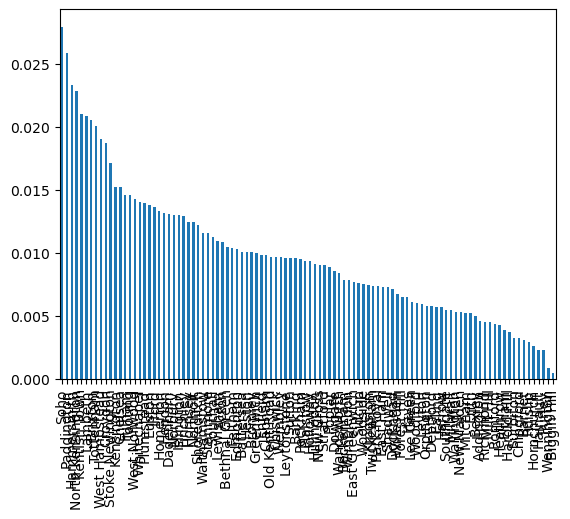

In [56]:
import matplotlib.pyplot as plt
Final_2['DeployedFromStation_Name'].value_counts(normalize=True).plot(kind='bar')
plt.show;

In [57]:
Final_2['IncidentStationGround']=Final_2['IncidentStationGround'].replace(['Acton','Addington','Barking','Barnet','Battersea',
                                                                          'Beckenham','Bethnal Green','Bexley',
                                                                           'Beyond Home Counties','Biggin Hill','Brixton',
                                                                          'Bromley','Chelsea','Chingford','Chiswick','Clapham',
                                                                          'Croydon','Dagenham','Deptford','Dockhead','Dowgate',
                                                                          'Ealing','East Greenwich','East Ham','Edmonton',
                                                                          'Eltham','Enfield','Erith','Euston','Feltham',
                                                                          'Finchley','Fordbridge','Forest Hill','Fulham',
                                                                          'Greenwich','Hainault','Hammersmith','Harold Hill',
                                                                          'Harrow','Hayes','Heathrow','Hendon','Hertfordshire',
                                                                          'Heston','Hillingdon','Holloway','Homerton',
                                                                            'Hornchurch','Hornsey','Ilford','Islington',
                                                                          'Kensington','Kentish Town','Kingston','Lambeth',
                                                                          'Lee Green','Lewisham','Leyton','Leytonstone',
                                                                          'Mill Hill','Millwall','Mitcham','New Cross',
                                                                          'New Malden','Norbury','North Kensington','Northolt',
                                                                           'Old Kent Road','Orpington','Paddington',
                                                                          'Park Royal','Peckham','Plaistow','Plumstead',
                                                                          'Poplar','Purley','Richmond','Romford','Ruislip',
                                                                          'Shadwell','Shoreditch','Sidcup','Soho','Southall',
                                                                          'Southgate','Stanmore','Stoke Newington','Stratford',
                                                                          'Surbiton','Sutton','Tooting','Tottenham',
                                                                           'Twickenham','Wallington','Walthamstow','Wandsworth',
                                                                          'Wembley','Wennington','West Hampstead','West Norwood',
                                                                          'Whitechapel','Willesden','Wimbledon','Woodford',
                                                                          'Woodside'],
                                                                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                                                                           21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
                                                                          39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,
                                                                          57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,
                                                                          75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,
                                                                          93,94,95,96,97,98,99,100,101,102,103,104,105])

In [58]:
Final_2['DeployedFromStation_Name']=Final_2['DeployedFromStation_Name'].replace(['Acton','Addington','Barking','Barnet','Battersea',
                                                                          'Beckenham','Bethnal Green','Bexley',
                                                                           'Beyond Home Counties','Biggin Hill','Brixton',
                                                                          'Bromley','Chelsea','Chingford','Chiswick','Clapham',
                                                                          'Croydon','Dagenham','Deptford','Dockhead','Dowgate',
                                                                          'Ealing','East Greenwich','East Ham','Edmonton',
                                                                          'Eltham','Enfield','Erith','Euston','Feltham',
                                                                          'Finchley','Fordbridge','Forest Hill','Fulham',
                                                                          'Greenwich','Hainault','Hammersmith','Harold Hill',
                                                                          'Harrow','Hayes','Heathrow','Hendon','Hertfordshire',
                                                                          'Heston','Hillingdon','Holloway','Homerton',
                                                                            'Hornchurch','Hornsey','Ilford','Islington',
                                                                          'Kensington','Kentish Town','Kingston','Lambeth',
                                                                          'Lee Green','Lewisham','Leyton','Leytonstone',
                                                                          'Mill Hill','Millwall','Mitcham','New Cross',
                                                                          'New Malden','Norbury','North Kensington','Northolt',
                                                                           'Old Kent Road','Orpington','Paddington',
                                                                          'Park Royal','Peckham','Plaistow','Plumstead',
                                                                          'Poplar','Purley','Richmond','Romford','Ruislip',
                                                                          'Shadwell','Shoreditch','Sidcup','Soho','Southall',
                                                                          'Southgate','Stanmore','Stoke Newington','Stratford',
                                                                          'Surbiton','Sutton','Tooting','Tottenham',
                                                                           'Twickenham','Wallington','Walthamstow','Wandsworth',
                                                                          'Wembley','Wennington','West Hampstead','West Norwood',
                                                                          'Whitechapel','Willesden','Wimbledon','Woodford',
                                                                          'Woodside'],
                                                                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                                                                           21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
                                                                          39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,
                                                                          57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,
                                                                          75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,
                                                                          93,94,95,96,97,98,99,100,101,102,103,104,105])

In [59]:
from datetime import date
Final_2['Joursem']=Final_2['DateOfCall_bis'].dt.weekday

In [60]:
Final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139168 entries, 0 to 139167
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 139168 non-null  object        
 1   CalYear                        139168 non-null  int64         
 2   HourOfCall                     139168 non-null  int64         
 3   IncidentGroup                  139168 non-null  int64         
 4   StopCodeDescription            139168 non-null  int64         
 5   PropertyCategory               139168 non-null  int64         
 6   AddressQualifier               139168 non-null  int64         
 7   ProperCase                     139168 non-null  int64         
 8   Easting_rounded                139168 non-null  int64         
 9   Northing_rounded               139168 non-null  int64         
 10  IncidentStationGround          139167 non-null  float64       
 11  

In [61]:
Calendrier=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/London_Pompyer_Calendrier.csv", sep=';')
Calendrier['DateOfCall_bis'] = pd.to_datetime(Calendrier['DateOfCall_bis'])

C:\Users\agrabia\AppData\Local\Temp\ipykernel_10668\1042827561.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Calendrier['DateOfCall_bis'] = pd.to_datetime(Calendrier['DateOfCall_bis'])


In [62]:
Calendrier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DateOfCall_bis            1247 non-null   datetime64[ns]
 1   jour ferie                1247 non-null   int64         
 2   vacances                  1247 non-null   int64         
 3   COVID (fermeture ecoles)  1247 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 39.1 KB


In [63]:
Final_2b=Final_2.merge(right=Calendrier, on='DateOfCall_bis')
Final_2b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135111 entries, 0 to 135110
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 135111 non-null  object        
 1   CalYear                        135111 non-null  int64         
 2   HourOfCall                     135111 non-null  int64         
 3   IncidentGroup                  135111 non-null  int64         
 4   StopCodeDescription            135111 non-null  int64         
 5   PropertyCategory               135111 non-null  int64         
 6   AddressQualifier               135111 non-null  int64         
 7   ProperCase                     135111 non-null  int64         
 8   Easting_rounded                135111 non-null  int64         
 9   Northing_rounded               135111 non-null  int64         
 10  IncidentStationGround          135110 non-null  float64       
 11  

In [64]:
Final_2b.corr()

C:\Users\agrabia\AppData\Local\Temp\ipykernel_10668\1387251547.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Final_2b.corr()


,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,AddressQualifier,ProperCase,Easting_rounded,Northing_rounded,IncidentStationGround,...,TravelTimeSeconds,AttendanceTimeSeconds,DeployedFromStation_Name,MinuteOfCall,DelayCodeId_bis,AFA,Joursem,jour ferie,vacances,COVID (fermeture ecoles)
CalYear,1.000000,-0.004507,-0.006872,-0.014144,-0.022131,0.017014,-0.005069,-0.006383,-0.006591,-0.006225,...,0.066744,0.062724,-0.004963,-0.001523,-0.011026,0.029578,-0.000655,0.004978,-0.035066,-0.076989
HourOfCall,-0.004507,1.000000,0.010520,0.019543,-0.006470,-0.001406,-0.006982,0.001961,0.000507,-0.005297,...,0.044354,-0.017615,-0.000661,-0.004475,-0.005313,-0.040910,-0.009704,-0.006999,-0.006852,-0.003650
IncidentGroup,-0.006872,0.010520,1.000000,0.978047,0.508622,-0.009736,-0.052474,0.037997,0.015360,-0.002171,...,0.081689,0.084636,-0.006940,-0.003282,-0.076234,-0.641166,0.001776,0.000084,0.003796,-0.006274
StopCodeDescription,-0.014144,0.019543,0.978047,1.000000,0.497233,-0.007055,-0.056014,0.046487,0.018674,-0.002364,...,0.088745,0.092431,-0.007410,-0.002598,-0.081616,-0.765879,0.003207,-0.000140,0.003048,-0.006061
PropertyCategory,-0.022131,-0.006470,0.508622,0.497233,1.000000,0.065679,-0.055070,0.039718,0.014153,-0.018382,...,0.088066,0.092843,-0.011609,-0.007886,-0.099589,-0.311767,0.000520,-0.003308,0.005520,-0.007148
AddressQualifier,0.017014,-0.001406,-0.009736,-0.007055,0.065679,1.000000,-0.051943,-0.030132,0.021919,-0.015591,...,0.014142,0.016414,-0.005472,0.002614,-0.013268,0.017375,-0.002434,-0.006240,-0.002272,0.004601
ProperCase,-0.005069,-0.006982,-0.052474,-0.056014,-0.055070,-0.051943,1.000000,-0.001004,-0.164277,0.191082,...,-0.089783,-0.094488,0.104317,-0.003258,0.031877,0.048579,0.000448,0.002105,-0.005557,0.004232
Easting_rounded,-0.006383,0.001961,0.037997,0.046487,0.039718,-0.030132,-0.001004,1.000000,0.029633,-0.103321,...,-0.039424,-0.036192,-0.091888,0.000563,0.002175,-0.058768,0.000077,-0.002043,0.002996,0.002186
Northing_rounded,-0.006591,0.000507,0.015360,0.018674,0.014153,0.021919,-0.164277,0.029633,1.000000,0.005602,...,0.033884,0.033819,0.063210,0.000872,-0.026690,-0.021622,0.006711,-0.003371,0.000702,0.002432
IncidentStationGround,-0.006225,-0.005297,-0.002171,-0.002364,-0.018382,-0.015591,0.191082,-0.103321,0.005602,1.000000,...,-0.003966,-0.001407,0.370508,-0.001685,-0.009962,0.004955,0.001428,0.002621,-0.003688,-0.003546


C:\Users\agrabia\AppData\Local\Temp\ipykernel_10668\3271086319.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Final_2b.corr(),annot=True,cmap='RdBu_r',center=0);


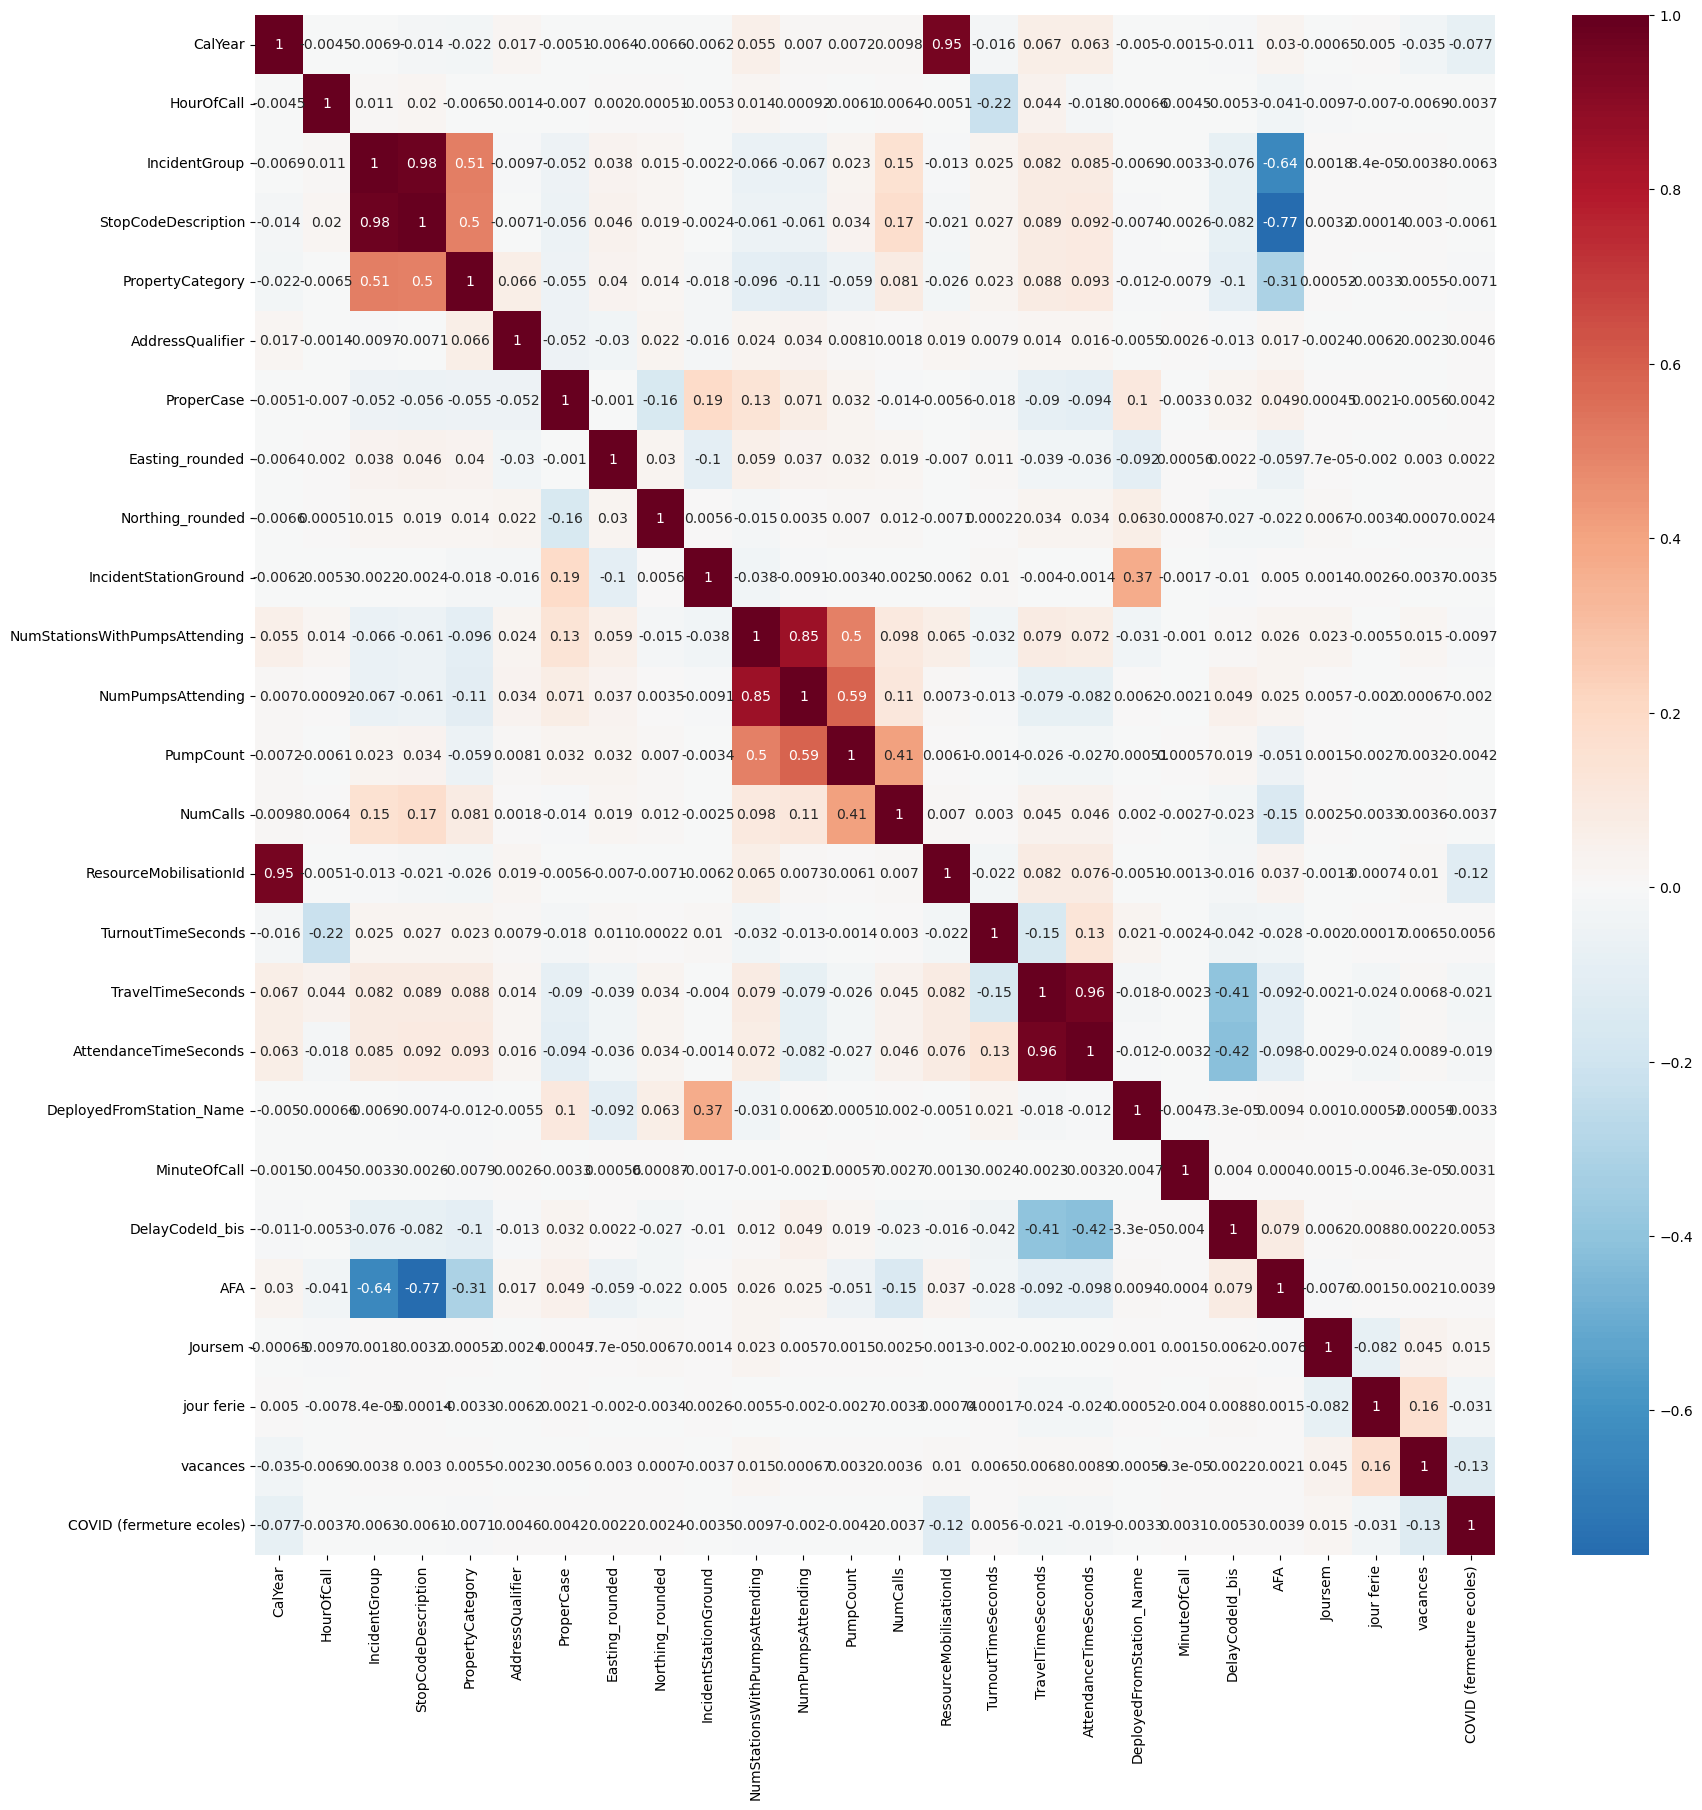

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(Final_2b.corr(),annot=True,cmap='RdBu_r',center=0);

In [66]:
Final_2b.to_csv (r"C:\Users\agrabia\Documents\Formation\Projet/Final_2b.csv", index = False, header=True)